<a href="https://colab.research.google.com/github/loftmain/opencv/blob/master/week3/cnn_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import imagenet_utils


In [10]:
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten
import keras

In [2]:
train_dir = './MyDrive/My Drive/dataset/clean-dataset/train'
validation_dir = './MyDrive/My Drive/dataset/clean-dataset/validation/'
image_size = 224

In [4]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size,3))

58892288/58889256 [==============================] - 2s 0us/step


In [6]:
model = models.Sequential()

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_batchsize = 20
val_batchsize = 10

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)



Found 141 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [12]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=3,
                             epochs=5,
                             validation_data=validation_generator,
                             validation_steps=3,
                             verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
3/3 [==============================] - 31s 10s/step - loss: 1.1650 - accuracy: 0.6667 - val_loss: 43880.6172 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2885613.2500 - val_accuracy: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 26495254.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 1s 228ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 104958224.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
3/3 [==============================] - 2s 532ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 264893728.0000 - val_accuracy: 0.0000e+00


In [14]:
for layer in vgg_conv.layers:
    layer.trainable = True
    
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False    

    
for layer in vgg_conv.layers:
    print(layer.trainable)
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [15]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

이것이 fine tunning이다!

In [ ]:
# 1 : 네트워크 구조만 사용
model = models.Sequential()

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

# 2 : 전체 재학습
for I in vgg_conv.layers:
    I.trainable = false
    # 2개의 네트워크를 분리해서 고속으로 학습

# fine tunning : 네크워크 구조 사용, 일부 필터(상위) 레이어의 가중치는 재사용
for i in vgg_conv.layers[:-4]:
    i.trainalbe = False

# Food 11 사진 분류

- Bread
- Dairy product
- Dessert
- Egg
- Fried food
- Meat
- Noodles/pasta
- Rice
- Seafood
- Soup
- 

In [18]:
!unzip "./MyDrive/My Drive/dataset/food-11.zip" -d "./MyDrive/My Drive/dataset/food"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./MyDrive/My Drive/dataset/food/training/8_807.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_808.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_809.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_81.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_810.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_811.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_812.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_813.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_814.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_815.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_816.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_817.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_818.jpg  
  inflating: ./MyDrive/My Drive/dataset/food/training/8_819.jpg  
  inflating: ./MyDrive/My Drive/dataset/f

In [5]:
import os
train = ["./MyDrive/My Drive/dataset/food/training/" + img for img in os.listdir("./MyDrive/My Drive/dataset/food/training")]
val = ["./MyDrive/My Drive/dataset/food/validation/" + img for img in os.listdir("./MyDrive/My Drive/dataset/food/validation")]
test = ["./MyDrive/My Drive/dataset/food/evaluation/" + img for img in os.listdir("./MyDrive/My Drive/dataset/food/evaluation")]

In [21]:
print(len(train))
print(len(test))

9866
3347


In [23]:
img= train[0]
print(img)

./MyDrive/My Drive/dataset/food/training/0_0.jpg


In [24]:
v = img.split("/")
print(v)
print(v[-1])

['.', 'MyDrive', 'My Drive', 'dataset', 'food', 'training', '0_0.jpg']
0_0.jpg


In [17]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]


In [26]:
print(train_y[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
from keras.utils import np_utils
num_classes = 11
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)


In [29]:
print(y_test[2322])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[994, 429, 1500, 986, 848, 1325, 440, 280, 855, 1500, 709]


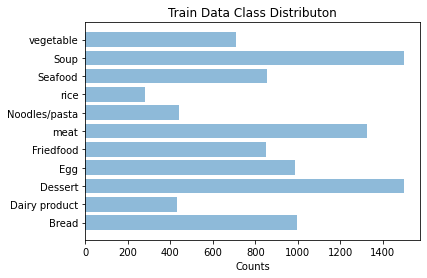

In [33]:
food_classes = ('Bread', 'Dairy product', 'Dessert', 'Egg', 'Friedfood', "meat", 'Noodles/pasta', 'rice', 'Seafood', 'Soup', 'vegetable')

y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(0, 11)]
print(counts)

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distributon')

plt.show()

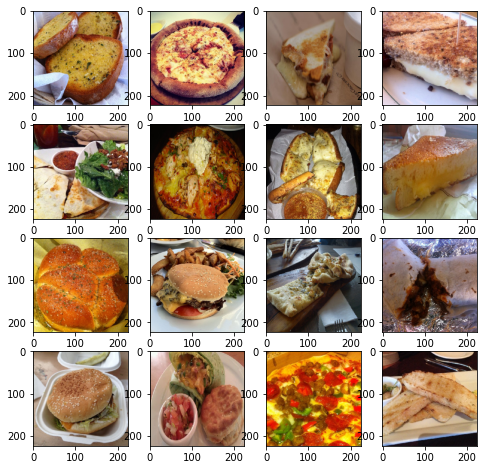

In [36]:
plt.figure(figsize=(8,8))

k = 0

for i in range(0,4):
    for j in range(0,4):
        image = load_img(train[k], target_size=(224, 224))
        plt.subplot2grid((4, 4), (i, j))
        plt.imshow(image)
        k = k + 1
plt.show()

In [3]:
def create_features(dataset):
    x_scratch = []
    i = 0
    for imagePath in dataset:
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0) # 4차원으로 변경
        image = imagenet_utils.preprocess_input(image) # VGG16을 돌리기위해 전처리
        x_scratch.append(image) # 이미지 누적
        if i % 500 == 0:
            print(i, len(dataset)) # 500번마다 한번씩 전체 이미지중 얼나마됬는지 출력
        i += 1
    x = np.vstack(x_scratch) # 리스트인 x_scratch를 넘파이로 바꾸기위해 vstack 사용
    return x

In [6]:
train_x = create_features(train)

0 9866
500 9866
1000 9866
1500 9866
2000 9866
2500 9866
3000 9866
3500 9866
4000 9866
4500 9866
5000 9866
5500 9866
6000 9866
6500 9866
7000 9866
7500 9866
8000 9866
8500 9866
9000 9866
9500 9866


In [7]:
test_x = create_features(test)


0 3347
500 3347
1000 3347
1500 3347
2000 3347
2500 3347
3000 3347


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

model_scratch = Sequential()
model_scratch.add(Conv2D(32, (3, 3), activation='relu',input_shape = train_x.shape[1:]))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(128, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(GlobalAveragePooling2D())
model_scratch.add(Dense(64, activation='relu'))
model_scratch.add(Dense(11, activation='softmax'))
model_scratch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)      

global_average_pooling 2d : 모든 픽셀의(전체) 글로벌하게 평균냄  
그러면 필터 수만큼 나오게 되는데 이것은 flatten과 동일한 형태가 되어서
데이터의 차원을 줄일수 있으며 flatten을 안쓸수 있다.  



In [19]:
model_scratch.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model_scratch.fit(train_x, y_train, 
          batch_size=32, epochs=10, 
          verbose=1, shuffle=True)

Epoch 1/10
309/309 [==============================] - 14s 44ms/step - loss: 2.2389 - accuracy: 0.2466
Epoch 2/10
309/309 [==============================] - 14s 44ms/step - loss: 1.9239 - accuracy: 0.3251
Epoch 3/10
309/309 [==============================] - 14s 44ms/step - loss: 1.7826 - accuracy: 0.3795
Epoch 4/10
309/309 [==============================] - 14s 44ms/step - loss: 1.6529 - accuracy: 0.4370
Epoch 5/10
309/309 [==============================] - 14s 44ms/step - loss: 1.5403 - accuracy: 0.4711
Epoch 6/10
309/309 [==============================] - 14s 44ms/step - loss: 1.4545 - accuracy: 0.5018
Epoch 7/10
309/309 [==============================] - 14s 44ms/step - loss: 1.3768 - accuracy: 0.5249
Epoch 8/10
309/309 [==============================] - 14s 44ms/step - loss: 1.2890 - accuracy: 0.5591
Epoch 9/10
309/309 [==============================] - 14s 44ms/step - loss: 1.2246 - accuracy: 0.5777
Epoch 10/10
309/309 [==============================] - 14s 44ms/step - loss: 1.158

이것은 transfer learning이 아니기 때문에 성능이 좋지 않다.  

# Transfer learning

In [ ]:
vgg_conv = VGG16(weights='imagenet', include_top=True, input_shape=(image_size, image_size,3))